** The goal of this notebook is to duplicate the analysis done in Grayson, Han, Winther, Phillips PNAS 104, 37 (2007) to get the friction as a function of fraction ejected for our ejection data. **

In [16]:
#load data sets and align them in time

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn
import helpers
import TakeDerivative as td

folder = '/home/agoldfain/group/agoldfain/poster/'
filelist = glob(folder+'*results.txt')

time_spacing = 0.01
max_frames = 5000

t_offset_point = 0.5
n_mov_avg = 50
step_offset = 5.0

times = np.arange(0,max_frames)*time_spacing
filelist.sort()


datas = []
index_offset = []

#load data
for i in range(0,len(filelist)):
    data = np.loadtxt(filelist[i], delimiter = ' ', skiprows = 1).T[2]
    datas.append( data)    

#load special imageJ data set
imj_file = glob(folder+'*ImageJ2x3*.txt')[0]
datas.append(np.loadtxt(imj_file))
last_max = np.mean(datas[-1][:750])
last_min = np.mean(datas[-1][3000:])
datas[-1] = (datas[-1] - last_min)/(last_max - last_min )

datas.reverse()

#get time offset to align each
for data in datas:   
    index_offset.append( abs(helpers.movingaverage1D(data,100)-t_offset_point).argmin()  )



(-10, 30)

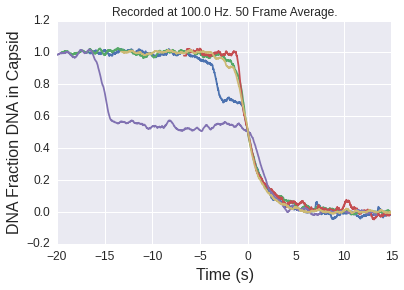

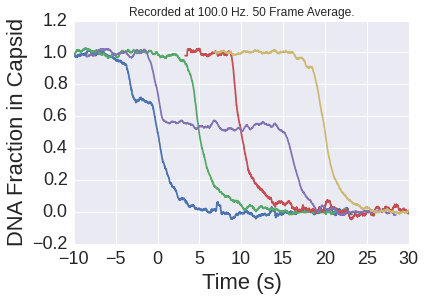

In [17]:
#plot fraction ejected vs. time
plt.figure();plt.title( 'Recorded at ' + str(1/time_spacing) + ' Hz. ' +str(n_mov_avg) + ' Frame Average.' )
for i in range(0,len(datas)):
    data = datas[i]
    time = times[:data.shape[0]] - index_offset[i]*time_spacing
    plt.plot(time,helpers.movingaverage1D(data,n_mov_avg), '-',label = str(i))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('DNA Fraction DNA in Capsid', fontsize=16)
plt.tick_params(axis = 'both',labelsize='12')
plt.xlim([-20,15])


plt.figure();plt.title( 'Recorded at ' + str(1/time_spacing) + ' Hz. ' +str(n_mov_avg) + ' Frame Average.' )
for i in range(0,len(datas)):
    data = datas[i]
    time = times[:data.shape[0]] - index_offset[i]*time_spacing + step_offset*i
    plt.plot(time,helpers.movingaverage1D(data,n_mov_avg),'-', label = str(i))
plt.xlabel('Time (s)', fontsize=22)
plt.ylabel('DNA Fraction in Capsid', fontsize=22)
plt.tick_params(axis = 'both',labelsize='18')
plt.xlim([-10,30])

(-20, 15)

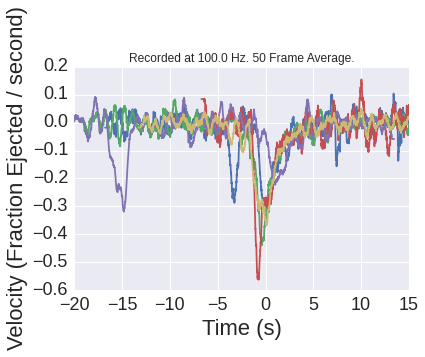

In [18]:
#Take derivative and plot ejection velocity vs. time.
derivs = []
for data in datas:
    derivs.append( td.diffDerivative(data,n_mov_avg)/time_spacing )


#plot derivative
plt.figure();plt.title( 'Recorded at ' + str(1/time_spacing) + ' Hz. ' +str(n_mov_avg) + ' Frame Average.' )
for i in range(0,len(derivs)):
    data = datas[i]
    time = times[:data.shape[0]-1] - index_offset[i]*time_spacing
    plt.plot(time,derivs[i],'-', label = str(i))
plt.xlabel('Time (s)', fontsize=22)
plt.ylabel('Velocity (Fraction Ejected / second)', fontsize=22)
plt.tick_params(axis = 'both',labelsize='18')
plt.xlim([-20,15])    